In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime
from scipy.stats import linregress
import gmaps
from config import q_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000,180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
coordinates = list(lat_lngs)

In [4]:
#create a list for holding the cities
cities = []
#identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    #if the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#print the city count to confirm sufficient count
len(cities)

620

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [6]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 32.32,
  'feels_like': 28.45,
  'temp_min': 28.38,
  'temp_max': 37.24,
  'pressure': 1022,
  'humidity': 78},
 'visibility': 10000,
 'wind': {'speed': 4, 'deg': 0, 'gust': 0},
 'clouds': {'all': 100},
 'dt': 1638412449,
 'sys': {'type': 2,
  'id': 2009921,
  'country': 'US',
  'sunrise': 1638359654,
  'sunset': 1638393176},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
   
    #log the url, record and set number and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | nome
Processing Record 2 of Set 1 | gat
Processing Record 3 of Set 1 | rio claro
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | amalapuram
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 9 of Set 1 | luderitz
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | sungaipenuh
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | thinadhoo
Processing Record 14 of Set 1 | jawhar
Processing Record 15 of Set 1 | mount gambier
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | manicore
Processing Record 18 of Set 1 | bilma
Processing Record 19 of Set 1 | awbari
Processing Record 20 of Set 1 | sur
Processing Record 21 of Set 1 | koch bihar
Processing Record 22 of Set 1 | cape town
Processing Record 23 of Set 1 | ushuaia
Processing Record 24 of Set 1 | pun

Processing Record 47 of Set 4 | saleaula
City not found. Skipping...
Processing Record 48 of Set 4 | esperance
Processing Record 49 of Set 4 | hay river
Processing Record 50 of Set 4 | bandarbeyla
Processing Record 1 of Set 5 | ovalle
Processing Record 2 of Set 5 | la ronge
Processing Record 3 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 4 of Set 5 | hami
Processing Record 5 of Set 5 | hokitika
Processing Record 6 of Set 5 | lusambo
Processing Record 7 of Set 5 | huaibei
Processing Record 8 of Set 5 | bud
Processing Record 9 of Set 5 | mehamn
Processing Record 10 of Set 5 | roald
Processing Record 11 of Set 5 | praia da vitoria
Processing Record 12 of Set 5 | mala
Processing Record 13 of Set 5 | lolua
City not found. Skipping...
Processing Record 14 of Set 5 | deputatskiy
Processing Record 15 of Set 5 | ahipara
Processing Record 16 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 17 of Set 5 | cherskiy
Processing Record 18 of Set 5 |

Processing Record 37 of Set 8 | cascais
Processing Record 38 of Set 8 | temerloh
Processing Record 39 of Set 8 | bambous virieux
Processing Record 40 of Set 8 | mangit
Processing Record 41 of Set 8 | bowling green
Processing Record 42 of Set 8 | mount isa
Processing Record 43 of Set 8 | roebourne
Processing Record 44 of Set 8 | karratha
Processing Record 45 of Set 8 | gazojak
Processing Record 46 of Set 8 | aswan
Processing Record 47 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 48 of Set 8 | alexandria
Processing Record 49 of Set 8 | port hedland
Processing Record 50 of Set 8 | aflu
City not found. Skipping...
Processing Record 1 of Set 9 | prince rupert
Processing Record 2 of Set 9 | diamantino
Processing Record 3 of Set 9 | banjar
Processing Record 4 of Set 9 | jiuquan
Processing Record 5 of Set 9 | nanortalik
Processing Record 6 of Set 9 | gunjur
Processing Record 7 of Set 9 | salalah
Processing Record 8 of Set 9 | vila franca do campo
Processing Record 9 of 

Processing Record 24 of Set 12 | beloretsk
Processing Record 25 of Set 12 | olafsvik
Processing Record 26 of Set 12 | tanete
Processing Record 27 of Set 12 | shitanjing
Processing Record 28 of Set 12 | fort saint john
City not found. Skipping...
Processing Record 29 of Set 12 | privokzalnyy
City not found. Skipping...
Processing Record 30 of Set 12 | jumla
Processing Record 31 of Set 12 | ondorhaan
City not found. Skipping...
Processing Record 32 of Set 12 | sola
Processing Record 33 of Set 12 | jaboticabal
Processing Record 34 of Set 12 | samusu
City not found. Skipping...
Processing Record 35 of Set 12 | pontianak
Processing Record 36 of Set 12 | lorengau
Processing Record 37 of Set 12 | esmeraldas
Processing Record 38 of Set 12 | cumbitara
Processing Record 39 of Set 12 | cervenia
Processing Record 40 of Set 12 | skibbereen
Processing Record 41 of Set 12 | labutta
City not found. Skipping...
Processing Record 42 of Set 12 | palampur
Processing Record 43 of Set 12 | pirapora
Processi

In [9]:
len(city_data)

576

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nome,64.5011,-165.4064,-11.13,65,1,3.44,US,2021-12-02 02:34:22
1,Gat,31.6100,34.7642,62.82,100,53,8.08,IL,2021-12-02 02:34:22
2,Rio Claro,-22.4114,-47.5614,71.42,79,0,4.61,BR,2021-12-02 02:34:22
3,Hithadhoo,-0.6000,73.0833,82.06,74,91,5.82,MV,2021-12-02 02:34:23
4,Amalapuram,16.5833,82.0167,79.18,63,7,6.53,IN,2021-12-02 02:34:23
5,Mar Del Plata,-38.0023,-57.5575,62.10,87,0,1.99,AR,2021-12-02 02:34:24
6,Busselton,-33.6500,115.3333,71.10,36,6,4.76,AU,2021-12-02 02:34:24
7,Luderitz,-26.6481,15.1594,58.84,70,0,16.89,NA,2021-12-02 02:34:25
8,Mataura,-46.1927,168.8643,71.87,42,100,5.50,NZ,2021-12-02 02:34:25
9,Sungaipenuh,-2.0833,101.3833,78.69,51,45,4.85,ID,2021-12-02 02:34:26


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nome,US,2021-12-02 02:34:22,64.5011,-165.4064,-11.13,65,1,3.44
1,Gat,IL,2021-12-02 02:34:22,31.6100,34.7642,62.82,100,53,8.08
2,Rio Claro,BR,2021-12-02 02:34:22,-22.4114,-47.5614,71.42,79,0,4.61
3,Hithadhoo,MV,2021-12-02 02:34:23,-0.6000,73.0833,82.06,74,91,5.82
4,Amalapuram,IN,2021-12-02 02:34:23,16.5833,82.0167,79.18,63,7,6.53
...,...,...,...,...,...,...,...,...,...
571,Shieli,KZ,2021-12-02 02:51:31,44.1667,66.7500,50.04,38,98,20.51
572,Usinsk,RU,2021-12-02 02:51:32,65.9939,57.5281,13.10,95,100,8.39
573,Kresek,ID,2021-12-02 02:51:32,-6.1314,106.3797,92.48,60,72,9.57
574,Nueve De Julio,AR,2021-12-02 02:51:32,-35.4444,-60.8831,62.71,75,16,8.12


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

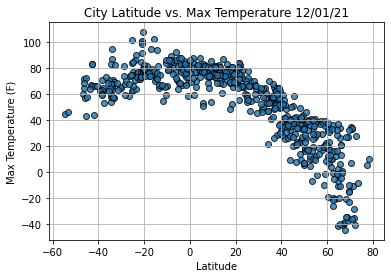

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

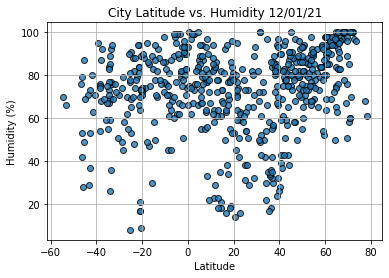

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


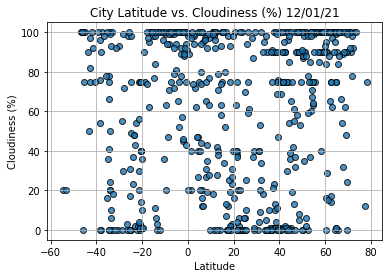

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

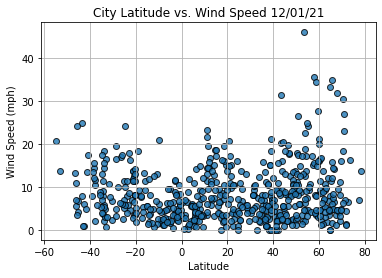

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

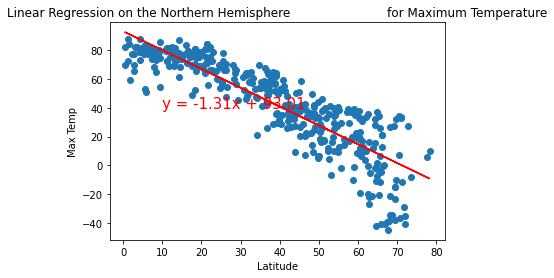

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


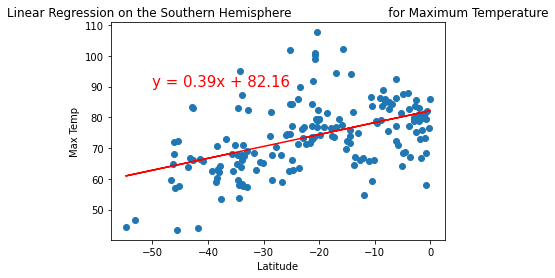

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

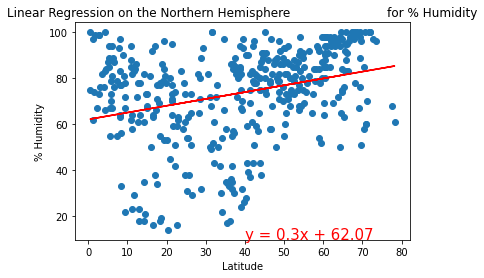

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


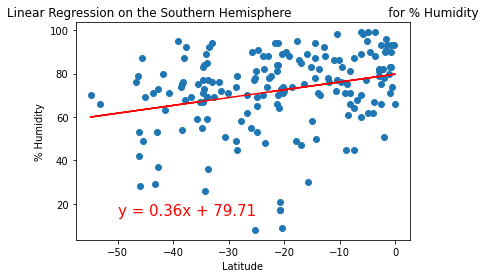

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

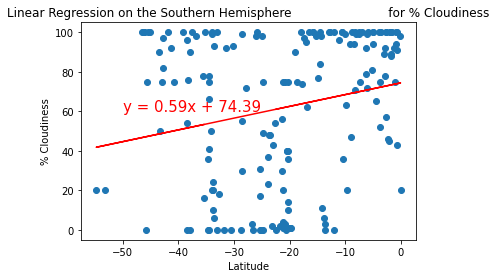

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


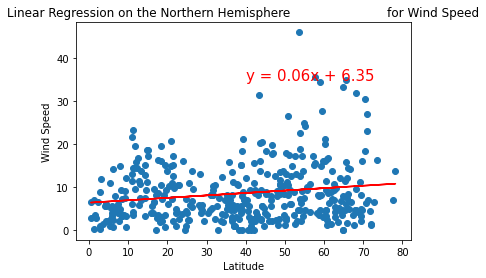

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

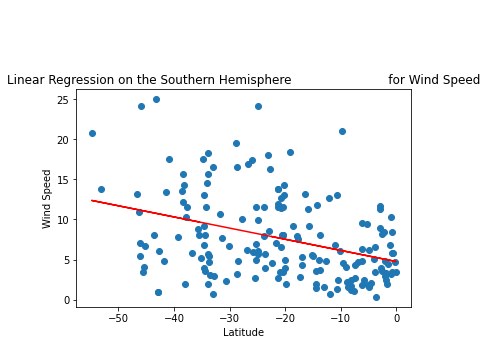

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))


In [28]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Nome,US,2021-12-02 02:34:22,64.5011,-165.4064,-11.13,65,1,3.44
1,1,Gat,IL,2021-12-02 02:34:22,31.6100,34.7642,62.82,100,53,8.08
2,2,Rio Claro,BR,2021-12-02 02:34:22,-22.4114,-47.5614,71.42,79,0,4.61
3,3,Hithadhoo,MV,2021-12-02 02:34:23,-0.6000,73.0833,82.06,74,91,5.82
4,4,Amalapuram,IN,2021-12-02 02:34:23,16.5833,82.0167,79.18,63,7,6.53


In [29]:
#confirm data types 
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [30]:
#configure gmaps to use API key
gmaps.configure(api_key=q_key)

In [36]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig_temp = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig_temp.add_layer(heat_layer)
# Call the figure to plot the data.
fig_temp


Figure(layout=FigureLayout(height='420px'))

In [37]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig_humidity = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig_humidity.add_layer(heat_layer)
# Call the figure to plot the data.
fig_humidity

Figure(layout=FigureLayout(height='420px'))

In [38]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig_cloud = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig_cloud.add_layer(heat_layer)
# Call the figure to plot the data.
fig_cloud

Figure(layout=FigureLayout(height='420px'))

In [39]:
# Heatmap of percent wind speed
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig_wind = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig_wind.add_layer(heat_layer)
# Call the figure to plot the data.
fig_wind

Figure(layout=FigureLayout(height='420px'))

In [41]:
#ask customers to add min and max temp values
min_temp = float(input("What is the minimum temperature you would like for your trip"))
max_temp = float(input("What is the maximum temperature you would like for your trip"))

What is the minimum temperature you would like for your trip75
What is the maximum temperature you would like for your trip100


In [42]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,3,Hithadhoo,MV,2021-12-02 02:34:23,-0.6000,73.0833,82.06,74,91,5.82
4,4,Amalapuram,IN,2021-12-02 02:34:23,16.5833,82.0167,79.18,63,7,6.53
9,9,Sungaipenuh,ID,2021-12-02 02:34:26,-2.0833,101.3833,78.69,51,45,4.85
11,11,Thinadhoo,MV,2021-12-02 02:34:27,0.5333,72.9333,82.00,75,89,6.42
12,12,Jawhar,SO,2021-12-02 02:34:27,2.7809,45.5005,77.13,73,98,8.77
23,23,New Norfolk,AU,2021-12-02 02:34:31,-42.7826,147.0587,82.90,37,82,1.01
25,25,Carnarvon,AU,2021-12-02 02:34:32,-24.8667,113.6333,77.07,53,0,24.16
27,27,Kailua,US,2021-12-02 02:34:33,21.4022,-157.7394,84.18,71,75,12.66
36,36,Tayug,PH,2021-12-02 02:34:36,16.0274,120.7434,83.35,50,80,5.61
38,38,Butaritari,KI,2021-12-02 02:34:37,3.0707,172.7902,82.27,76,72,11.83


In [46]:
preferred_cities_df.dropna(inplace=True)

/Users/byanka/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
preferred_cities_df.isnull().sum()

City_ID       0
City          0
Country       0
Date          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
dtype: int64

In [48]:
preferred_cities_df.count()

City_ID       146
City          146
Country       146
Date          146
Lat           146
Lng           146
Max Temp      146
Humidity      146
Cloudiness    146
Wind Speed    146
dtype: int64

In [49]:
#DataFrame for hotel pop_up markers, city, country, max temp, and coordinates
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
3,Hithadhoo,MV,82.06,-0.6000,73.0833,
4,Amalapuram,IN,79.18,16.5833,82.0167,
9,Sungaipenuh,ID,78.69,-2.0833,101.3833,
11,Thinadhoo,MV,82.00,0.5333,72.9333,
12,Jawhar,SO,77.13,2.7809,45.5005,
23,New Norfolk,AU,82.90,-42.7826,147.0587,
25,Carnarvon,AU,77.07,-24.8667,113.6333,
27,Kailua,US,84.18,21.4022,-157.7394,
36,Tayug,PH,83.35,16.0274,120.7434,
38,Butaritari,KI,82.27,3.0707,172.7902,
